# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import urllib

# Import API key
api_key = "ddc8623c6fb3863388a5ffd466cbd6a4"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [27]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1

for i, city in enumerate(cities):
    if(i % 50 == 0 and i >= 50):
        record_count = 0
        set_count += 1
        
    city_url = url + "&q=" + urllib.request.pathname2url(city)
        
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
   
    
    record_count += 1
    
    try:
   
        city_weather = requests.get(city_url).json()
        
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
      
        city_data.append({"Max Temp": city_max_temp,"Humidity": city_humidity,"Lng": city_lng,"Cloudiness": city_clouds,"Wind Speed": city_wind,
                          "Country": city_country,"Date": city_date,"City": city,"Lat": city_lat})
   
    except:
        pass
    

print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | fort-shevchenko
Processing Record 3 of Set 1 | zapolyarnyy
Processing Record 4 of Set 1 | tuatapere
Processing Record 5 of Set 1 | kaitangata
Processing Record 6 of Set 1 | saleaula
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | briancon
Processing Record 9 of Set 1 | yerbogachen
Processing Record 10 of Set 1 | kavieng
Processing Record 11 of Set 1 | faya
Processing Record 12 of Set 1 | tasiilaq
Processing Record 13 of Set 1 | olafsvik
Processing Record 14 of Set 1 | nyurba
Processing Record 15 of Set 1 | okhotsk
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | naro
Processing Record 18 of Set 1 | mindif
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | san patricio
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | port hardy
Processing Record 23 of Set 1 | chagda


Processing Record 47 of Set 4 | lebu
Processing Record 48 of Set 4 | hobart
Processing Record 49 of Set 4 | nouadhibou
Processing Record 0 of Set 5 | qaanaaq
Processing Record 1 of Set 5 | indore
Processing Record 2 of Set 5 | vila franca do campo
Processing Record 3 of Set 5 | thompson
Processing Record 4 of Set 5 | saint anthony
Processing Record 5 of Set 5 | leningradskiy
Processing Record 6 of Set 5 | nelson bay
Processing Record 7 of Set 5 | ogaminana
Processing Record 8 of Set 5 | katangli
Processing Record 9 of Set 5 | auki
Processing Record 10 of Set 5 | gat
Processing Record 11 of Set 5 | wulanhaote
Processing Record 12 of Set 5 | kodiak
Processing Record 13 of Set 5 | volga
Processing Record 14 of Set 5 | virginia beach
Processing Record 15 of Set 5 | nyimba
Processing Record 16 of Set 5 | novorzhev
Processing Record 17 of Set 5 | sambava
Processing Record 18 of Set 5 | cockburn town
Processing Record 19 of Set 5 | vardo
Processing Record 20 of Set 5 | balkanabat
Processing R

Processing Record 48 of Set 8 | palabuhanratu
Processing Record 49 of Set 8 | pechory
Processing Record 0 of Set 9 | sosnogorsk
Processing Record 1 of Set 9 | jiuquan
Processing Record 2 of Set 9 | bintulu
Processing Record 3 of Set 9 | pemangkat
Processing Record 4 of Set 9 | osmaniye
Processing Record 5 of Set 9 | baker city
Processing Record 6 of Set 9 | juneau
Processing Record 7 of Set 9 | te anau
Processing Record 8 of Set 9 | phan rang
Processing Record 9 of Set 9 | tevaitoa
Processing Record 10 of Set 9 | ust-ishim
Processing Record 11 of Set 9 | kautokeino
Processing Record 12 of Set 9 | nishihara
Processing Record 13 of Set 9 | ilhabela
Processing Record 14 of Set 9 | san carlos del zulia
Processing Record 15 of Set 9 | hami
Processing Record 16 of Set 9 | aklavik
Processing Record 17 of Set 9 | yuzhno-yeniseyskiy
Processing Record 18 of Set 9 | blythe
Processing Record 19 of Set 9 | jinchengjiang
Processing Record 20 of Set 9 | babanusah
Processing Record 21 of Set 9 | nhulu

Processing Record 44 of Set 12 | kandrian
Processing Record 45 of Set 12 | utiroa
Processing Record 46 of Set 12 | south lake tahoe
Processing Record 47 of Set 12 | aqtobe
Processing Record 48 of Set 12 | blackwater
Processing Record 49 of Set 12 | orsha
Processing Record 0 of Set 13 | bonthe
Processing Record 1 of Set 13 | lakes entrance
Processing Record 2 of Set 13 | mgachi
Processing Record 3 of Set 13 | snezhnogorsk
Processing Record 4 of Set 13 | lolua
Processing Record 5 of Set 13 | bonham
Processing Record 6 of Set 13 | makaha
Processing Record 7 of Set 13 | jiaozuo
Processing Record 8 of Set 13 | moose factory
Processing Record 9 of Set 13 | makung
Processing Record 10 of Set 13 | tigil
Processing Record 11 of Set 13 | katobu
Processing Record 12 of Set 13 | matay
Processing Record 13 of Set 13 | jackson
Processing Record 14 of Set 13 | penzance
Processing Record 15 of Set 13 | linxia
Processing Record 16 of Set 13 | nioro
Processing Record 17 of Set 13 | baiyin
--------------

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
city_data_pd = pd.DataFrame(city_data)

wind_speed = city_data_pd["Wind Speed"]
lats = city_data_pd["Lat"]
cloudiness = city_data_pd["Cloudiness"]
humidity = city_data_pd["Humidity"]
max_temps = city_data_pd["Max Temp"]

city_data_pd.count()

City          559
Cloudiness    559
Country       559
Date          559
Humidity      559
Lat           559
Lng           559
Max Temp      559
Wind Speed    559
dtype: int64

In [5]:
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bluff,0,AU,1536902801,26,-23.58,149.07,85.07,9.17
1,fort-shevchenko,8,KZ,1536902989,65,44.51,50.26,72.92,19.69
2,zapolyarnyy,75,RU,1536900600,81,69.43,30.82,48.20,9.17
3,tuatapere,0,NZ,1536902870,80,-46.13,167.69,54.65,15.10
4,kaitangata,44,NZ,1536902549,56,-46.28,169.85,57.35,14.76


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

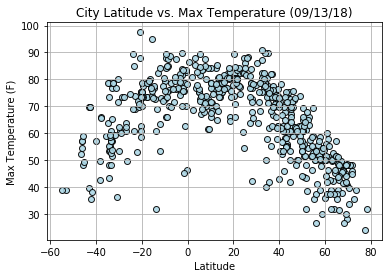

In [24]:
plt.scatter(lats, max_temps, color="lightblue", edgecolor="black", linewidths=1, marker="o", alpha=0.9,label="Cities")

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

#### Latitude vs. Humidity Plot

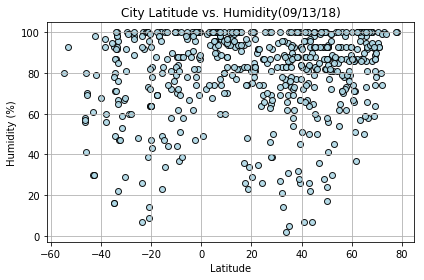

In [25]:
plt.scatter(lats, humidity, color="lightblue", edgecolor="black", linewidths=1, marker="o", alpha = 0.9,label="Cities")

plt.title("City Latitude vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.tight_layout()
plt.show()

#### Latitude vs. Cloudiness Plot

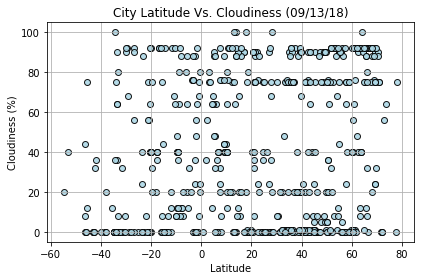

In [26]:
plt.scatter(lats,cloudiness, color="lightblue", edgecolor="black", linewidths=1, marker="o", alpha = 0.9,label="Cities")

plt.title("City Latitude Vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.tight_layout()
plt.show()

#### Latitude vs. Wind Speed Plot

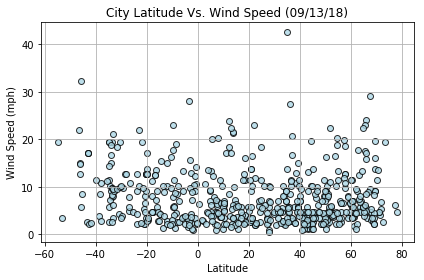

In [15]:
plt.scatter(lats, wind_speed, color="lightblue", edgecolor="black", linewidths=1, marker="o", alpha=0.9, label="Cities")

plt.title("City Latitude Vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.tight_layout()
plt.show()